In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 연도별 데이터 불러오기

In [4]:
df16 = pd.read_csv('2016_certificate_data.csv')
df16.columns = ['자격취득년도','취득월','자격구분코드','자격구분명','지역코드','지역명','연령대코드','연령대','성별코드','성별','계열코드','계열명','종목코드','종목명','취득 수']
df16 = df16[['자격취득년도','취득월','자격구분명','지역명','연령대','성별','계열명','종목명','취득 수']]
df16_incheon = df16[df16['지역명'].str.contains('인천')]
df16_incheon_1030 = df16_incheon[(df16_incheon['연령대'] ==  '10대') | (df16_incheon['연령대'] == '20대') | (df16_incheon['연령대'] == '30대')]

df17 = pd.read_csv('2017_certificate_data.csv')
df17.columns = ['자격취득년도','취득월','자격구분코드','자격구분명','지역코드','지역명','연령대코드','연령대','성별코드','성별','계열코드','계열명','종목코드','종목명','취득 수']
df17 = df17[['자격취득년도','취득월','자격구분명','지역명','연령대','성별','계열명','종목명','취득 수']]
df17_incheon = df17[df17['지역명'].str.contains('인천')]
df17_incheon_1030 = df17_incheon[(df17_incheon['연령대'] ==  '10대') | (df17_incheon['연령대'] == '20대') | (df17_incheon['연령대'] == '30대')]

df18 = pd.read_csv('2018_certificate_data.csv')
df18.columns = ['자격취득년도','취득월','자격구분코드','자격구분명','지역코드','지역명','연령대코드','연령대','성별코드','성별','계열코드','계열명','종목코드','종목명','취득 수']
df18 = df18[['자격취득년도','취득월','자격구분명','지역명','연령대','성별','계열명','종목명','취득 수']]
df18_incheon = df18[df18['지역명'].str.contains('인천')]
df18_incheon_1030 = df18_incheon[(df18_incheon['연령대'] ==  '10대') | (df18_incheon['연령대'] == '20대') | (df18_incheon['연령대'] == '30대')]

df19 = pd.read_csv('2019_certificate_data.csv')
df19.columns = ['자격취득년도','취득월','자격구분코드','자격구분명','지역코드','지역명','연령대코드','연령대','성별코드','성별','계열코드','계열명','종목코드','종목명','취득 수']
df19 = df19[['자격취득년도','취득월','자격구분명','지역명','연령대','성별','계열명','종목명','취득 수']]
df19_incheon = df19[df19['지역명'].str.contains('인천')]
df19_incheon_1030 = df19_incheon[(df19_incheon['연령대'] ==  '10대') | (df19_incheon['연령대'] == '20대') | (df19_incheon['연령대'] == '30대')]

df20 = pd.read_csv('2020_certificate_data.csv')
df20.columns = ['자격취득년도','취득월','자격구분코드','자격구분명','지역코드','지역명','연령대코드','연령대','성별코드','성별','계열코드','계열명','종목코드','종목명','취득 수']
df20 = df20[['자격취득년도','취득월','자격구분명','지역명','연령대','성별','계열명','종목명','취득 수']]
df20_incheon = df20[df20['지역명'].str.contains('인천')]
df20_incheon_1030 = df20_incheon[(df20_incheon['연령대'] ==  '10대') | (df20_incheon['연령대'] == '20대') | (df20_incheon['연령대'] == '30대')]

### 연도별 데이터 카운트

In [5]:
df16_incheon_1030.count = len(df16_incheon_1030)
df17_incheon_1030.count = len(df17_incheon_1030)
df18_incheon_1030.count = len(df18_incheon_1030)
df19_incheon_1030.count = len(df19_incheon_1030)
df20_incheon_1030.count = len(df20_incheon_1030)

print(df16_incheon_1030.count)
print(df17_incheon_1030.count)
print(df18_incheon_1030.count)
print(df19_incheon_1030.count)
print(df20_incheon_1030.count)

2573
2557
2677
2685
2723


In [6]:
df16_incheon_1030.head(3)

,자격취득년도,취득월,자격구분명,지역명,연령대,성별,계열명,종목명,취득 수
11,2016,1,국가기술자격,인천,10대,남성,기능사,정보처리기능사,2
12,2016,1,국가기술자격,인천,20대,남성,기능사,굴삭기운전기능사,1
13,2016,1,국가기술자격,인천,20대,남성,기능사,표면처리기능사,1


In [7]:
a = pd.concat([df16_incheon_1030,df17_incheon_1030,df18_incheon_1030,df19_incheon_1030,df20_incheon_1030])
b = pd.DataFrame(a['자격취득년도'].value_counts())

b = b.reset_index()
b.columns = ['년도','자격취득 수']

In [8]:
b = b.sort_values(by='년도',ascending=True)
b = b.reset_index(drop=True)
b

,년도,자격취득 수
0,2016,2573
1,2017,2557
2,2018,2677
3,2019,2685
4,2020,2723


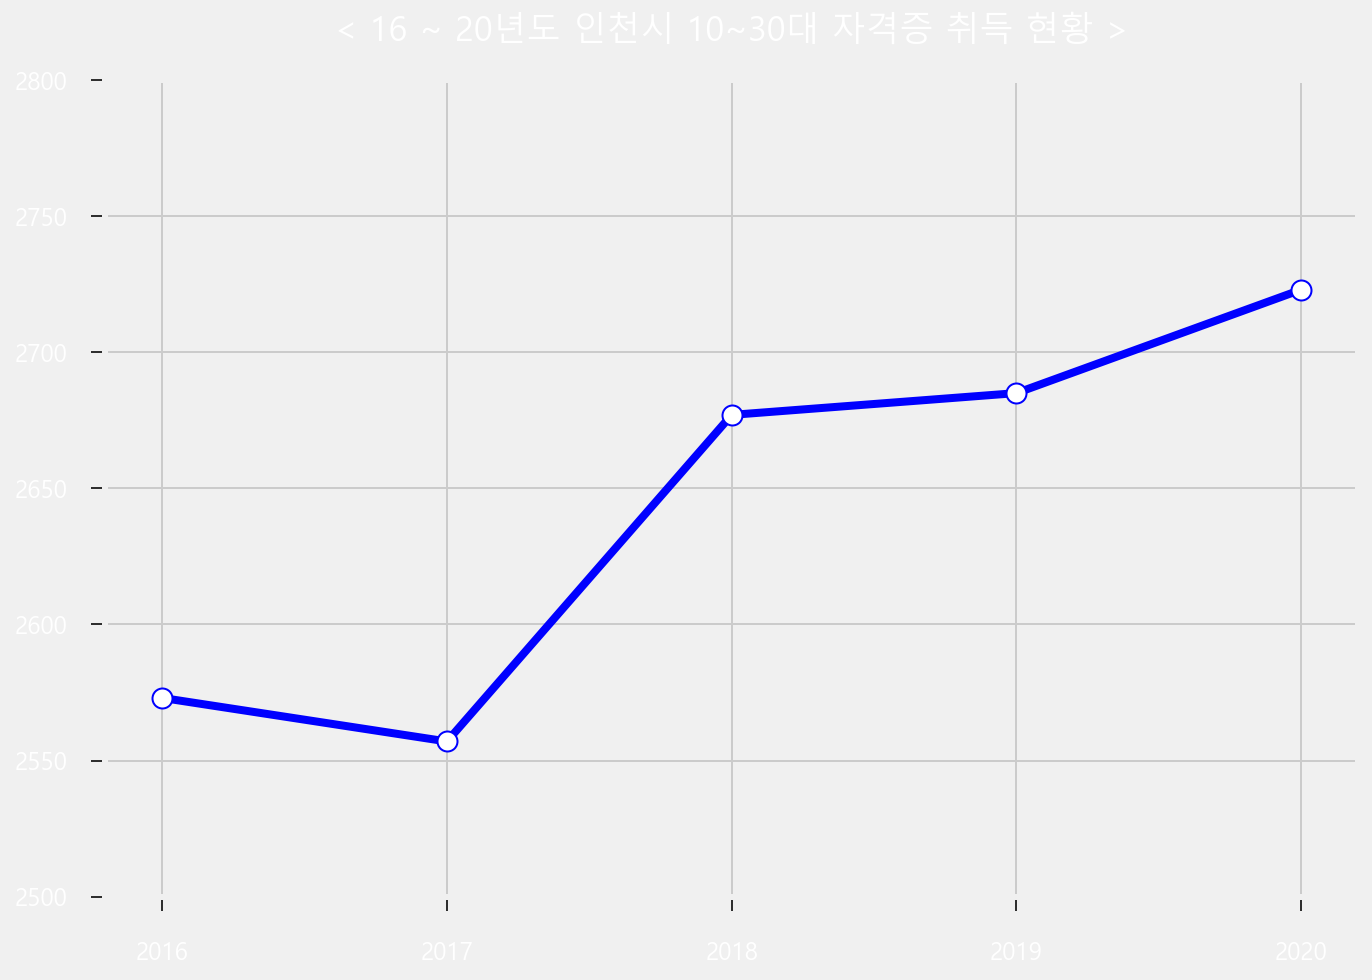

In [9]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()

plt.plot(b['년도'],b['자격취득 수'],color='blue',marker='o',markerfacecolor = 'w', markersize=10)
plt.xticks(np.arange(2016,2021,step=1))
plt.yticks(np.arange(2500,2801,step=50))

plt.tick_params(axis='x',pad=15,length=7,labelsize=12,labelcolor='white')
plt.tick_params(axis='y',pad=12,length=7,labelsize=12,labelcolor='white')

plt.title('< 16 ~ 20년도 인천시 10~30대 자격증 취득 현황 >',size=17,pad=20,color='white')
plt.show()

### 남자 연령대별 자격증 취득 수, 순위

In [10]:
df1620_inc_1030 = pd.concat([df16_incheon_1030,df17_incheon_1030,df18_incheon_1030,df19_incheon_1030,df20_incheon_1030])

In [11]:
m10 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '10대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
m10['순위'] = m10['종목명'].rank(method='dense',ascending=False)
m10 = m10.reset_index()
m10.columns = ['종목명','획득 수','순위']
m10.head(10)

,종목명,획득 수,순위
0,한식조리기능사,57,1.0
1,중식조리기능사,56,2.0
2,양식조리기능사,56,2.0
3,제빵기능사,54,3.0
4,지게차운전기능사,53,4.0
5,굴삭기운전기능사,52,5.0
6,미용사(일반),51,6.0
7,제과기능사,50,7.0
8,일식조리기능사,47,8.0
9,정보처리기능사,37,9.0


In [12]:
m20 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '20대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
m20['순위'] = m20['종목명'].rank(method='dense',ascending=False)
m20 = m20.reset_index()
m20.columns = ['종목명','획득 수','순위']
m20.head(10)

,종목명,획득 수,순위
0,굴삭기운전기능사,58,1.0
1,지게차운전기능사,57,2.0
2,한식조리기능사,57,2.0
3,미용사(일반),57,2.0
4,제빵기능사,56,3.0
5,양식조리기능사,55,4.0
6,제과기능사,52,5.0
7,중식조리기능사,50,6.0
8,일식조리기능사,41,7.0
9,정보처리기능사,38,8.0


In [13]:
m30 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '30대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
m30['순위'] = m30['종목명'].rank(method='dense',ascending=False)
m30 = m30.reset_index()
m30.columns = ['종목명','획득 수','순위']
m30.head(10)

,종목명,획득 수,순위
0,굴삭기운전기능사,57,1.0
1,지게차운전기능사,57,1.0
2,한식조리기능사,52,2.0
3,제빵기능사,51,3.0
4,중식조리기능사,45,4.0
5,양식조리기능사,44,5.0
6,미용사(일반),43,6.0
7,제과기능사,38,7.0
8,일식조리기능사,34,8.0
9,정보처리기능사,32,9.0


In [14]:
a = df1620_inc_1030[(df1620_inc_1030['연령대'] == '10대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
a = a.head(10)
a

,종목명
한식조리기능사,57
중식조리기능사,56
양식조리기능사,56
제빵기능사,54
지게차운전기능사,53
굴삭기운전기능사,52
미용사(일반),51
제과기능사,50
일식조리기능사,47
정보처리기능사,37


In [15]:
b = df1620_inc_1030[(df1620_inc_1030['연령대'] == '20대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
b = b.head(10)
b

,종목명
굴삭기운전기능사,58
지게차운전기능사,57
한식조리기능사,57
미용사(일반),57
제빵기능사,56
양식조리기능사,55
제과기능사,52
중식조리기능사,50
일식조리기능사,41
정보처리기능사,38


In [16]:
c = df1620_inc_1030[(df1620_inc_1030['연령대'] == '30대')&(df1620_inc_1030['성별']=='남성')]['종목명'].value_counts().to_frame()
c = c.head(10)
c

,종목명
굴삭기운전기능사,57
지게차운전기능사,57
한식조리기능사,52
제빵기능사,51
중식조리기능사,45
양식조리기능사,44
미용사(일반),43
제과기능사,38
일식조리기능사,34
정보처리기능사,32


In [17]:
d = pd.concat([a,b,c],axis=1)
d = d.reset_index()
d.columns = ['종목명','10대 획득수','20대 획득수','30대 획득수']

In [18]:
d

,종목명,10대 획득수,20대 획득수,30대 획득수
0,굴삭기운전기능사,52,58,57
1,미용사(일반),51,57,43
2,양식조리기능사,56,55,44
3,일식조리기능사,47,41,34
4,정보처리기능사,37,38,32
5,제과기능사,50,52,38
6,제빵기능사,54,56,51
7,중식조리기능사,56,50,45
8,지게차운전기능사,53,57,57
9,한식조리기능사,57,57,52


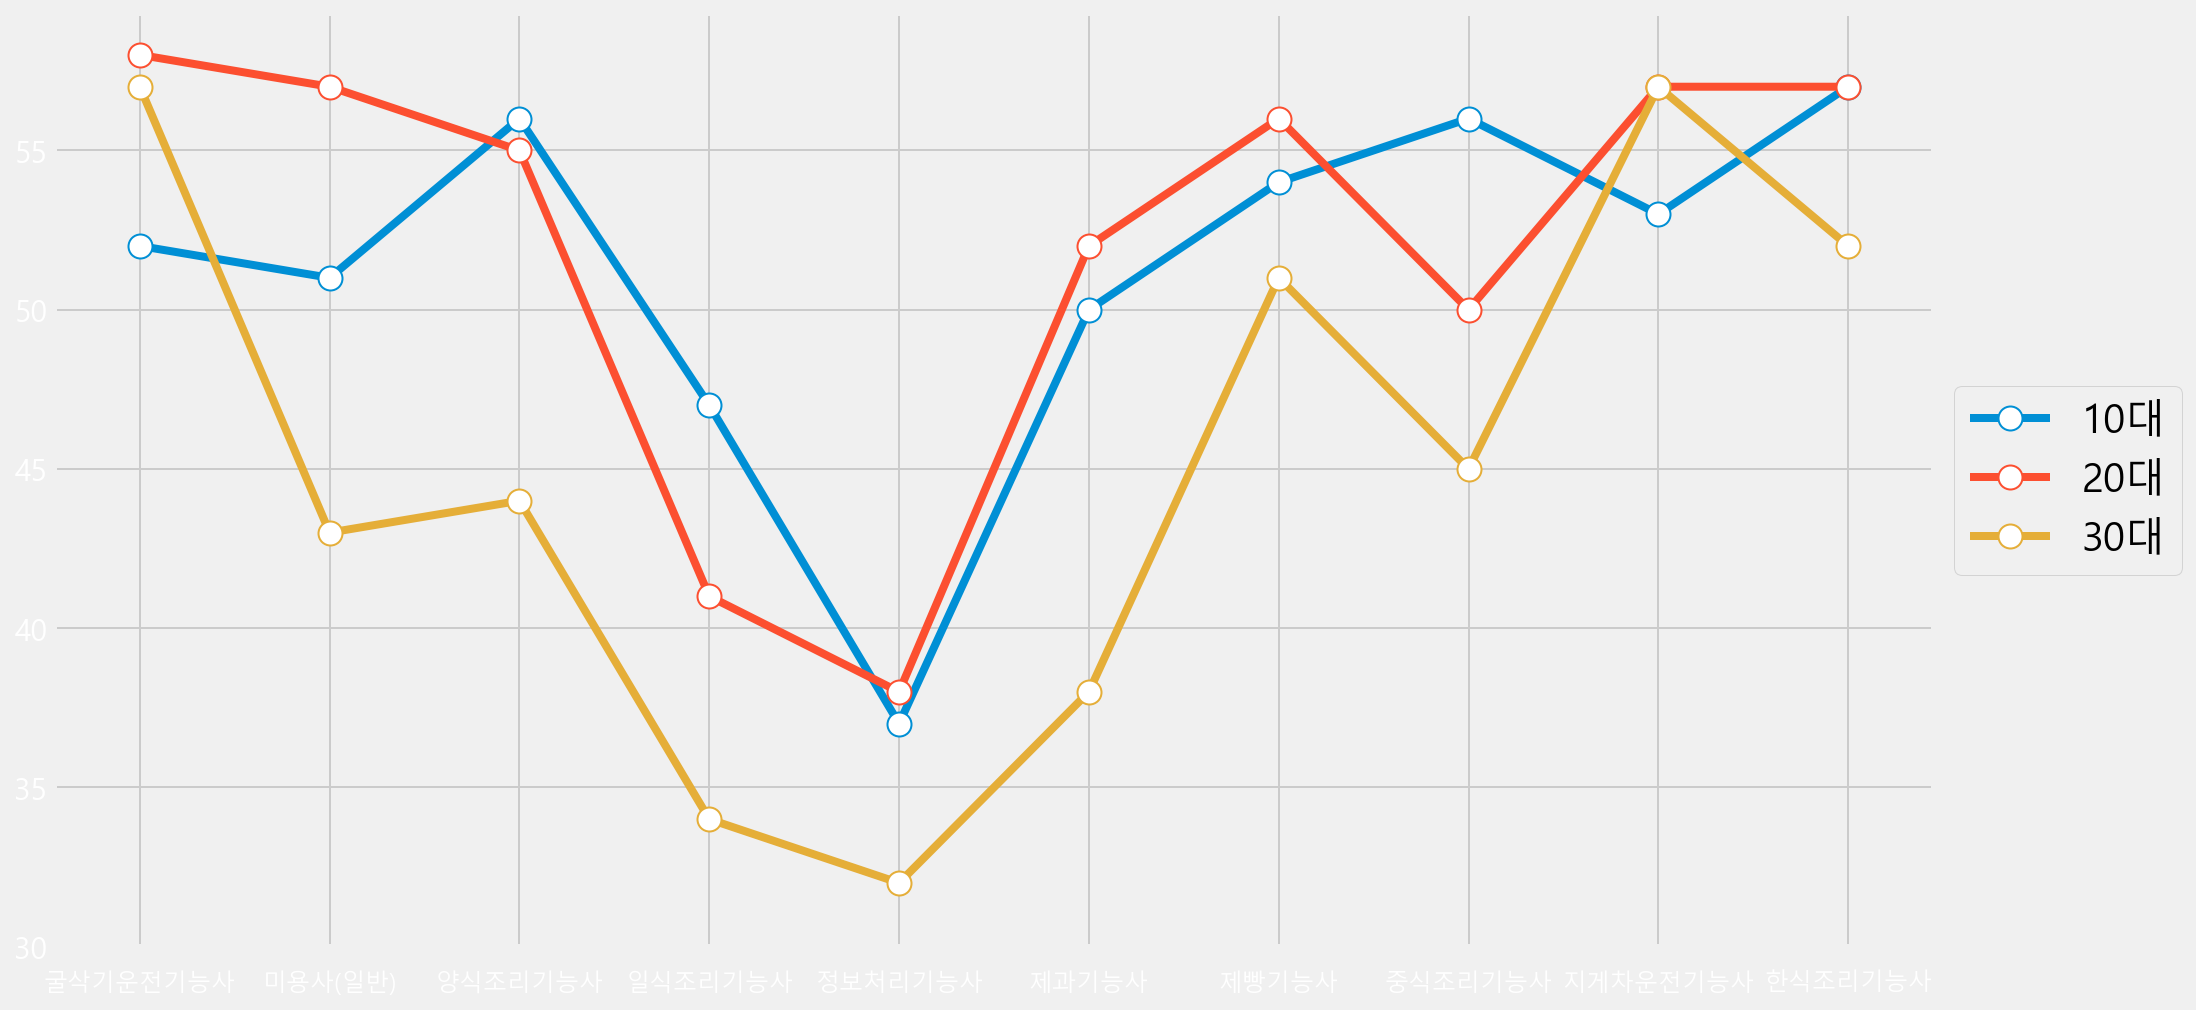

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

plt.plot(d['종목명'],d['10대 획득수'],marker='o',markerfacecolor='w',markersize=12,label = '10대')
plt.plot(d['종목명'],d['20대 획득수'],marker='o',markerfacecolor='w',markersize=12,label = '20대')
plt.plot(d['종목명'],d['30대 획득수'],marker='o',markerfacecolor='w',markersize=12,label = '30대')
plt.yticks(np.arange(30, 60, step=5),fontsize=15, color='white')
plt.tick_params(axis='x', pad = 12, labelsize=12, labelcolor='white')

plt.legend(loc='center left', bbox_to_anchor = (1, 0.5), fontsize=20)

### 여자 연령대별 자격증 취득 수, 순위

In [20]:
g10 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '10대')&(df1620_inc_1030['성별']=='여성')]['종목명'].value_counts().to_frame()
g10['순위'] = g10['종목명'].rank(method='dense',ascending=False)
g10 = g10.reset_index()
g10.columns = ['종목명','획득 수','순위']
g10.head(10)

,종목명,획득 수,순위
0,미용사(일반),57,1.0
1,양식조리기능사,57,1.0
2,제과기능사,56,2.0
3,한식조리기능사,56,2.0
4,중식조리기능사,55,3.0
5,제빵기능사,55,3.0
6,미용사(피부),53,4.0
7,일식조리기능사,46,5.0
8,미용사(네일),35,6.0
9,정보처리기능사,33,7.0


In [21]:
g20 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '20대')&(df1620_inc_1030['성별']=='여성')]['종목명'].value_counts().to_frame()
g20['순위'] = g20['종목명'].rank(method='dense',ascending=False)
g20 = g20.reset_index()
g20.columns = ['종목명','획득 수','순위']
g20.head(10)

,종목명,획득 수,순위
0,한식조리기능사,58,1.0
1,제빵기능사,57,2.0
2,제과기능사,57,2.0
3,미용사(일반),57,2.0
4,양식조리기능사,55,3.0
5,미용사(피부),53,4.0
6,중식조리기능사,46,5.0
7,미용사(네일),36,6.0
8,정보처리기능사,31,7.0
9,일식조리기능사,31,7.0


In [22]:
g30 = df1620_inc_1030[(df1620_inc_1030['연령대'] == '30대')&(df1620_inc_1030['성별']=='여성')]['종목명'].value_counts().to_frame()
g30['순위'] = g30['종목명'].rank(method='dense',ascending=False)
g30 = g30.reset_index()
g30.columns = ['종목명','획득 수','순위']
g30.head(10)

,종목명,획득 수,순위
0,한식조리기능사,58,1.0
1,미용사(일반),57,2.0
2,제과기능사,57,2.0
3,제빵기능사,57,2.0
4,양식조리기능사,56,3.0
5,중식조리기능사,54,4.0
6,미용사(피부),54,4.0
7,미용사(네일),35,5.0
8,일식조리기능사,30,6.0
9,미용사(메이크업),29,7.0


In [28]:
d.columns = ['종목명','10대','20대','30대']

In [29]:
d_trans = d.transpose()
d_trans = d_trans.rename(columns=d_trans.iloc[0])
d_trans = d_trans.drop(d_trans.index[0])
d_trans = d_trans.reset_index()

In [30]:
d_trans.columns = ['연령대별 획득 수','굴삭기운전기능사','미용사(일반)','양식조리기능사','일식조리기능사','정보처리기능사','제과기능사','제빵기능사','중식조리기능사','지게차운전기능사','한식조리기능사']
d_trans

,연령대별 획득 수,굴삭기운전기능사,미용사(일반),양식조리기능사,일식조리기능사,정보처리기능사,제과기능사,제빵기능사,중식조리기능사,지게차운전기능사,한식조리기능사
0,10대,52,51,56,47,37,50,54,56,53,57
1,20대,58,57,55,41,38,52,56,50,57,57
2,30대,57,43,44,34,32,38,51,45,57,52


### 남자 연령대별 자격증 취득 시각화

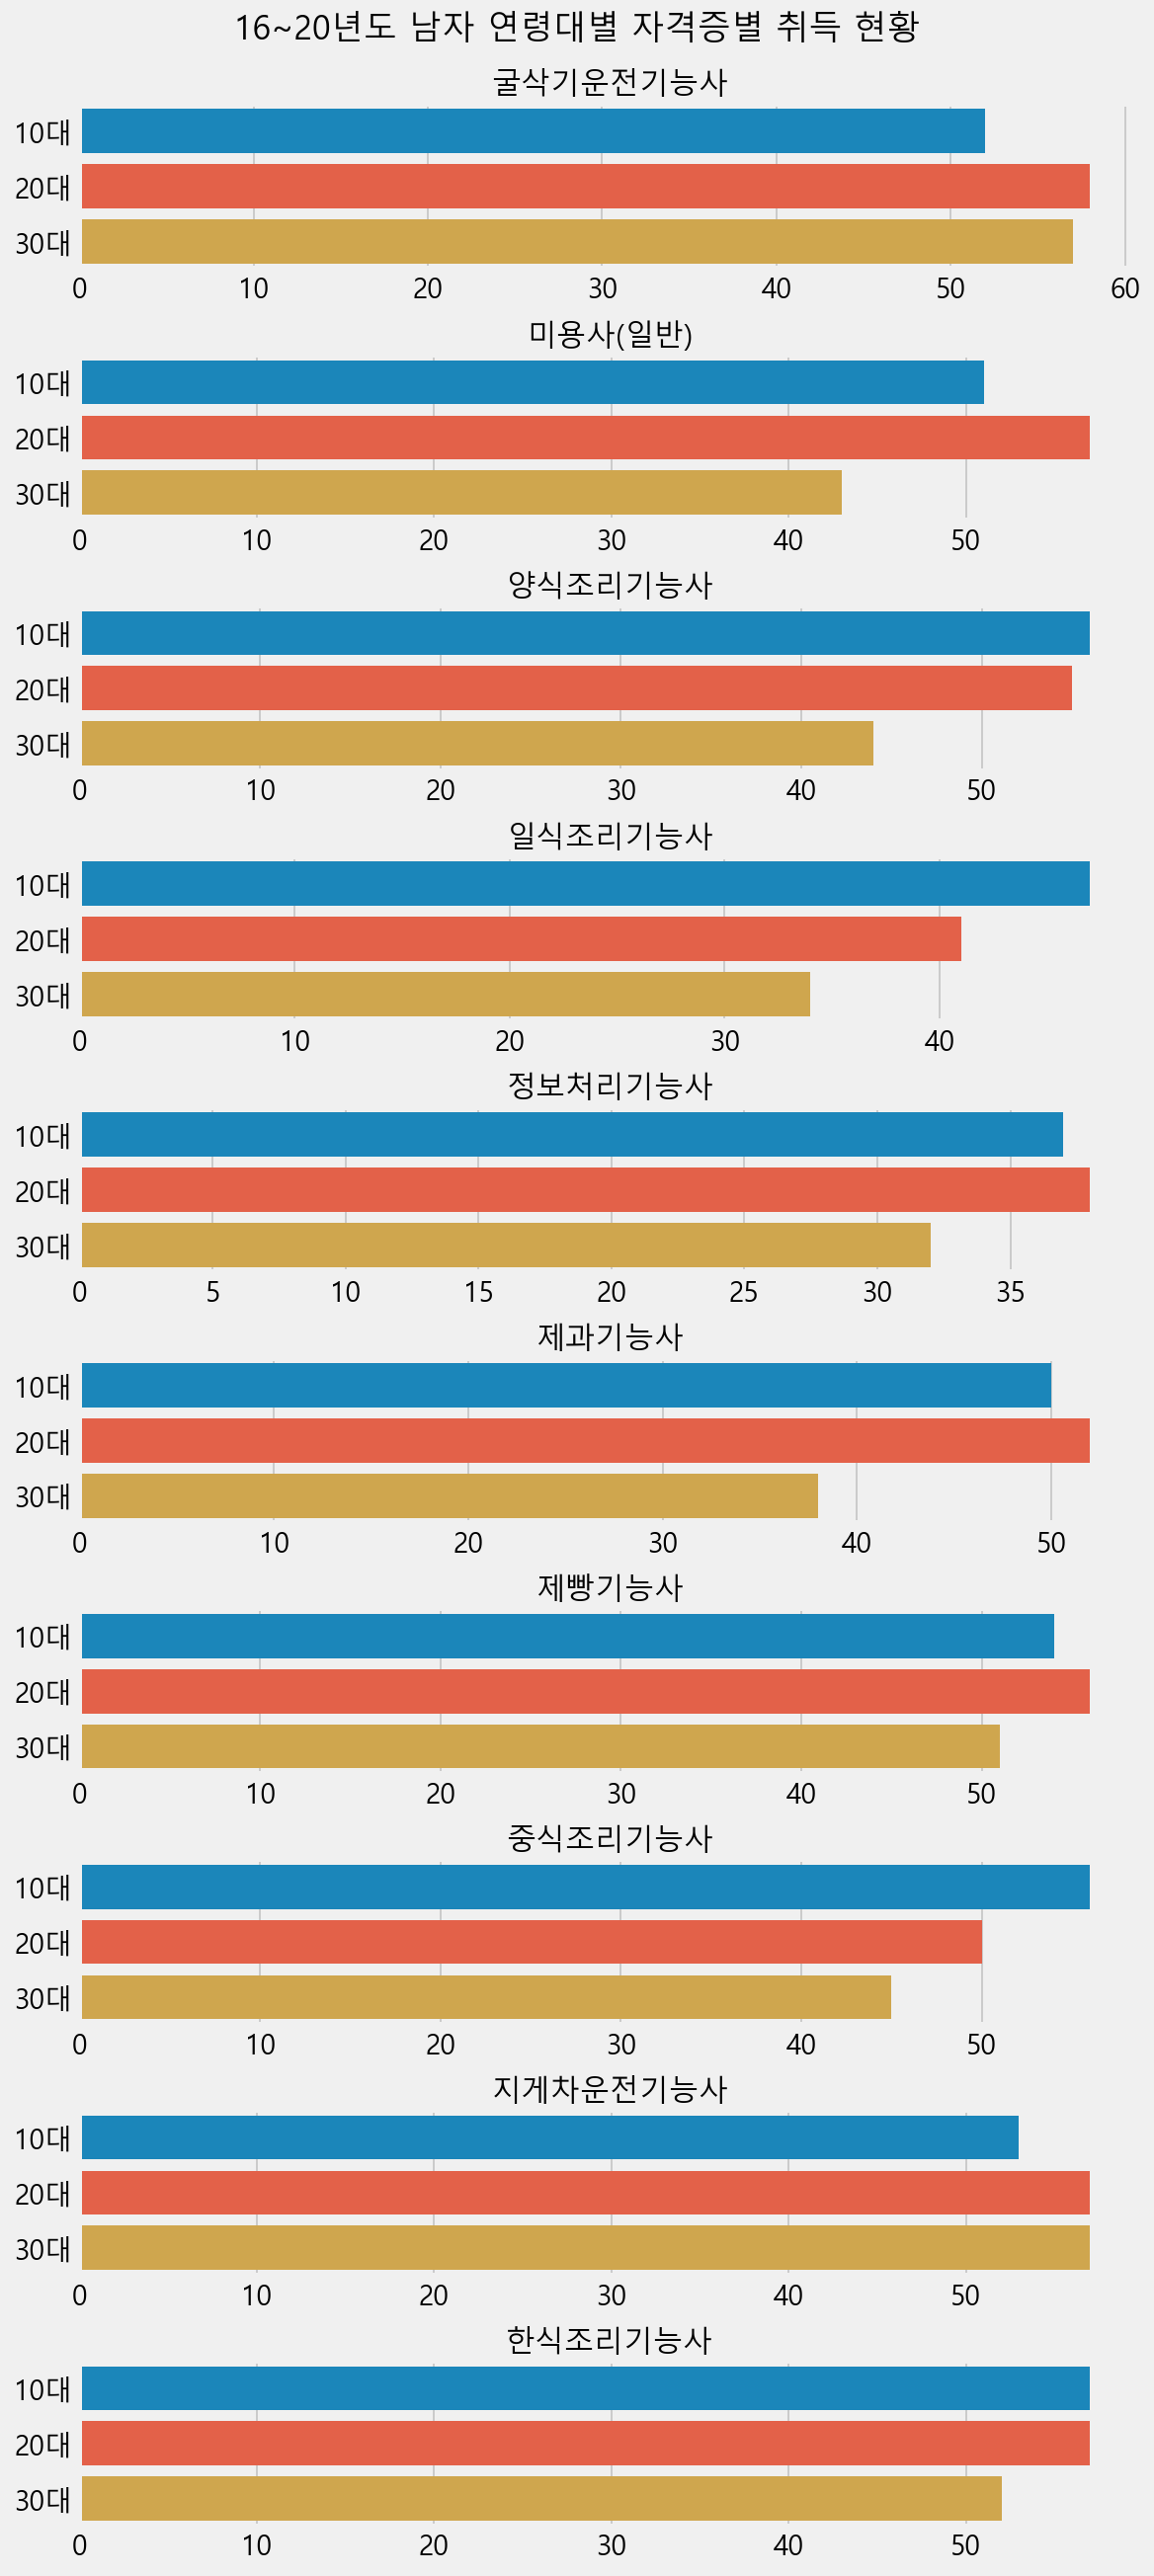

In [67]:
fig, axes = plt.subplots(10,1, figsize=(8,18),constrained_layout=True)
fig.suptitle('16~20년도 남자 연령대별 자격증별 취득 현황')

axes[0].set_title('굴삭기운전기능사',pad=5,size=15)
g1 = sns.barplot(ax=axes[0], x=d_trans['굴삭기운전기능사'], y=d_trans['연령대별 획득 수'])
g1.set(xlabel=None)
g1.set(ylabel=None)

axes[1].set_title('미용사(일반)',pad=5,size=15)
g2 = sns.barplot(ax=axes[1], x=d_trans['미용사(일반)'], y=d_trans['연령대별 획득 수'])
g2.set(xlabel=None)
g2.set(ylabel=None)

axes[2].set_title('양식조리기능사',pad=5,size=15)
g2 = sns.barplot(ax=axes[2], x=d_trans['양식조리기능사'], y=d_trans['연령대별 획득 수'])
g2.set(xlabel=None)
g2.set(ylabel=None)

axes[3].set_title('일식조리기능사',pad=5,size=15)
g3 = sns.barplot(ax=axes[3], x=d_trans['일식조리기능사'], y=d_trans['연령대별 획득 수'])
g3.set(xlabel=None)
g3.set(ylabel=None)

axes[4].set_title('정보처리기능사',pad=5,size=15)
g4 = sns.barplot(ax=axes[4], x=d_trans['정보처리기능사'], y=d_trans['연령대별 획득 수'])
g4.set(xlabel=None)
g4.set(ylabel=None)

axes[5].set_title('제과기능사',pad=5,size=15)
g5 = sns.barplot(ax=axes[5], x=d_trans['제과기능사'], y=d_trans['연령대별 획득 수'])
g5.set(xlabel=None)
g5.set(ylabel=None)

axes[6].set_title('제빵기능사',pad=5,size=15)
g6 = sns.barplot(ax=axes[6], x=d_trans['제빵기능사'], y=d_trans['연령대별 획득 수'])
g6.set(xlabel=None)
g6.set(ylabel=None)

axes[7].set_title('중식조리기능사',pad=5,size=15)
g7 = sns.barplot(ax=axes[7], x=d_trans['중식조리기능사'], y=d_trans['연령대별 획득 수'])
g7.set(xlabel=None)
g7.set(ylabel=None)

axes[8].set_title('지게차운전기능사',pad=5,size=15)
g8 = sns.barplot(ax=axes[8], x=d_trans['지게차운전기능사'], y=d_trans['연령대별 획득 수'])
g8.set(xlabel=None)
g8.set(ylabel=None)

axes[9].set_title('한식조리기능사',pad=5,size=15)
g9 = sns.barplot(ax=axes[9], x=d_trans['한식조리기능사'], y=d_trans['연령대별 획득 수'])
g9.set(xlabel=None)
g9.set(ylabel=None)

plt.show()